# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Imported additional dependencies (to read json files, to create stat outputs, and print formatting)
import json
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1800)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


711

In [10]:
# Test URL
pprint(requests.get(url).json())

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 60.2776, 'lon': 47.0659},
 'dt': 1610793194,
 'id': 508068,
 'main': {'feels_like': -11.33,
          'grnd_level': 993,
          'humidity': 92,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 1.11,
          'temp_max': 1.11,
          'temp_min': 1.11},
 'name': 'Podosinovets',
 'sys': {'country': 'RU', 'sunrise': 1610775596, 'sunset': 1610799757},
 'timezone': 10800,
 'visibility': 4907,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 19, 'speed': 10.85}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
city_weather = []

print ("Beginning Data Retrieval")
print("--------------------------")

rcd = 0
sets = 1
for city in cities:
    rcd += 1
  
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        sets += 1
        rcd = 0
    
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        city_weather.append({
            'City':city,
            'Lat': response['coord']['lat'],
            'Long': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Wind': response['wind']['speed'],
            'Cloudiness': response['clouds']['all'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    except:
        print('City not found. Skipping...')
        pass                        

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | krasnyy tkach
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | cap malheureux
Processing Record 13 of Set 1 | clarksdale
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | alyangula
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | thanh hoa
Processing Record 22 of Set 1 | airai
Processing Record 23 of Set 1 | amapa
Processing Record 2

City not found. Skipping...
Processing Record 39 of Set 4 | ahuimanu
Processing Record 40 of Set 4 | manokwari
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | nishihara
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | elizabeth city
Processing Record 46 of Set 4 | ayorou
Processing Record 47 of Set 4 | chlorakas
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | nevelsk
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | sawtell
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | yeniseysk
Processing Record 5 of Set 5 | nadym
Processing Record 6 of Set 5 | khonuu
City not found. Skipping...
Processing Record 7 of Set 5 | miles city
Processing Record 8 of Set 5 | severobaykalsk
Processing Record 9 of Set 5 | srednekolymsk
Processing Reco

Processing Record 24 of Set 8 | the valley
Processing Record 25 of Set 8 | vila franca do campo
Processing Record 26 of Set 8 | beringovskiy
Processing Record 27 of Set 8 | barawe
City not found. Skipping...
Processing Record 28 of Set 8 | ascension
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | dakoro
Processing Record 32 of Set 8 | sholapur
Processing Record 33 of Set 8 | rafai
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | sahuaripa
Processing Record 36 of Set 8 | lolua
City not found. Skipping...
Processing Record 37 of Set 8 | bunbury
Processing Record 38 of Set 8 | kunszentmarton
Processing Record 39 of Set 8 | batemans bay
Processing Record 40 of Set 8 | san policarpo
Processing Record 41 of Set 8 | navolato
Processing Record 42 of Set 8 | mareeba
Processing Record 43 of Set 8 | nkhotakota
Processing Record 44 of Set 8 | sioux lookout
Processing Record 45 of Set 8 | adeje
Processing R

City not found. Skipping...
Processing Record 15 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 16 of Set 12 | vicosa do ceara
Processing Record 17 of Set 12 | verkhnevilyuysk
Processing Record 18 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 12 | tegh
Processing Record 20 of Set 12 | vorobyevka
Processing Record 21 of Set 12 | la macarena
Processing Record 22 of Set 12 | aklavik
Processing Record 23 of Set 12 | ballina
Processing Record 24 of Set 12 | khani
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | gberia fotombu
Processing Record 28 of Set 12 | sorland
Processing Record 29 of Set 12 | urumqi
Processing Record 30 of Set 12 | ixtapa
Processing Record 31 of Set 12 | brewster
Processing Record 32 of Set 12 | bayangol
Processing Record 33 of Set 12 | namibe
Processing Record 34 of Set 12 | ponca city
Processing Record 35 of Set 12 | rudbar
Processing Record 36 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_df = pd.DataFrame(city_weather)
city_df.head()

# Export Dataframe into a .csv
# city_df.to_csv('WeatherPy'\output_data_file)

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,meulaboh,4.1363,96.1285,78.71,83,1.21,92,ID,1610796299
1,tasiilaq,65.6145,-37.6368,30.20,93,11.50,40,GL,1610796299
2,albany,42.6001,-73.9662,33.01,88,4.36,100,US,1610796004
3,krasnyy tkach,55.4721,39.0802,5.00,78,13.42,90,RU,1610796299
4,ushuaia,-54.8000,-68.3000,53.60,71,8.05,40,AR,1610796082


In [49]:
city_df = pd.DataFrame(city_weather)
city_df.head()

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,meulaboh,4.1363,96.1285,78.71,83,1.21,92,ID,1610796299
1,tasiilaq,65.6145,-37.6368,30.20,93,11.50,40,GL,1610796299
2,albany,42.6001,-73.9662,33.01,88,4.36,100,US,1610796004
3,krasnyy tkach,55.4721,39.0802,5.00,78,13.42,90,RU,1610796299
4,ushuaia,-54.8000,-68.3000,53.60,71,8.05,40,AR,1610796082


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
try: 
    print(city_df.loc[city_df['Humidity']>100])

except:
    print("No cities with humidty over 100")


Empty DataFrame
Columns: [City, Lat, Long, Max Temp, Humidity, Wind, Cloudiness, Country, Date]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
outliers = city_df[city_df['Humidity']>city_df['Humidity'].mean() + 3 * city_df['Humidity'].std()]
print(outliers)

Empty DataFrame
Columns: [City, Lat, Long, Max Temp, Humidity, Wind, Cloudiness, Country, Date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

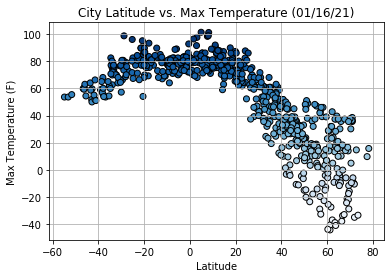

In [65]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Max Temp']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Blues', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

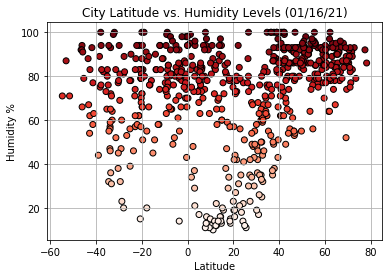

In [66]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Humidity']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Reds', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Humidity Levels ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

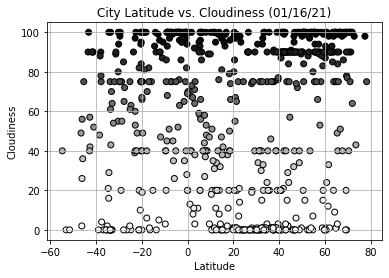

In [68]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Cloudiness']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Greys', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

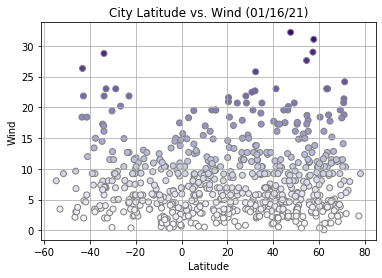

In [71]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Wind']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Purples', edgecolor='grey')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Wind ({time.strftime("%x")})')
plt.grid()

plt.show()

## Linear Regression

In [76]:
north_hemisphere = (city_df.loc[city_df['Lat']>0])
north_hemisphere.head()

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,meulaboh,4.1363,96.1285,78.71,83,1.21,92,ID,1610796299
1,tasiilaq,65.6145,-37.6368,30.20,93,11.50,40,GL,1610796299
2,albany,42.6001,-73.9662,33.01,88,4.36,100,US,1610796004
3,krasnyy tkach,55.4721,39.0802,5.00,78,13.42,90,RU,1610796299
7,tuktoyaktuk,69.4541,-133.0374,-11.49,86,11.39,78,CA,1610796300


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression